# Gradient Boosting - Demonstration

Using sklearn's GradientBoostingClassifier (full from-scratch is very complex).

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
np.random.seed(42)

---
## Load Data

In [2]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Data: {X.shape}')
print(f'Classes: {cancer.target_names}')

Data: (569, 30)
Classes: ['malignant' 'benign']


---
## Gradient Boosting

In [3]:
# Train Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
print('='*60)
print('GRADIENT BOOSTING')
print('='*60)
print(f'n_estimators: {gb.n_estimators}')
print(f'learning_rate: {gb.learning_rate}')
print(f'max_depth: {gb.max_depth}')
print(f'\nAccuracy: {acc_gb*100:.2f}%')

GRADIENT BOOSTING
n_estimators: 100
learning_rate: 0.1
max_depth: 3

Accuracy: 95.61%


---
## Compare with Other Ensembles

In [4]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_ada = accuracy_score(y_test, y_pred_ada)

print('='*60)
print('ENSEMBLE COMPARISON')
print('='*60)
print(f'Gradient Boosting: {acc_gb*100:.2f}%')
print(f'Random Forest:     {acc_rf*100:.2f}%')
print(f'AdaBoost:          {acc_ada*100:.2f}%')

ENSEMBLE COMPARISON
Gradient Boosting: 95.61%
Random Forest:     96.49%
AdaBoost:          97.37%


---
## Training Progress

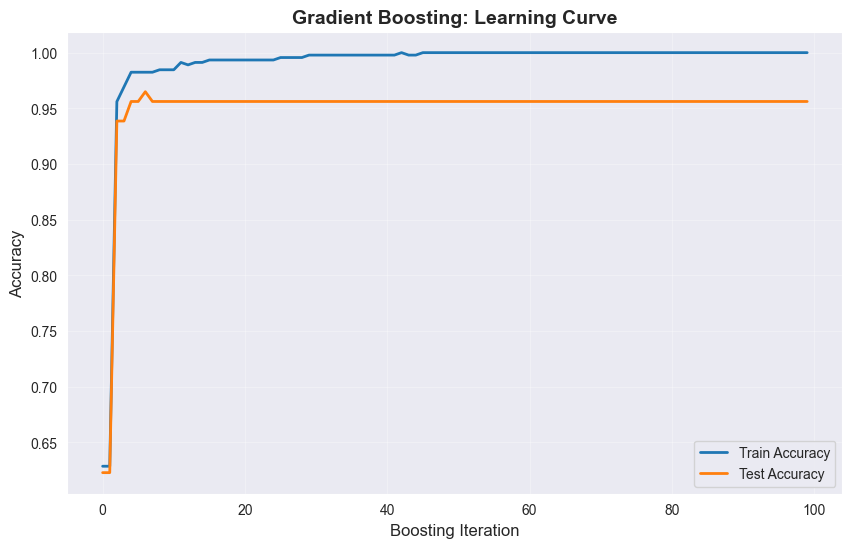

Peak test accuracy: 96.49% at iteration 7


In [5]:
# Track training and test performance
train_scores = []
test_scores = []

for i, y_pred in enumerate(gb.staged_predict(X_train)):
    train_scores.append(accuracy_score(y_train, y_pred))

for i, y_pred in enumerate(gb.staged_predict(X_test)):
    test_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(train_scores, label='Train Accuracy', linewidth=2)
plt.plot(test_scores, label='Test Accuracy', linewidth=2)
plt.xlabel('Boosting Iteration', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Gradient Boosting: Learning Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'Peak test accuracy: {max(test_scores)*100:.2f}% at iteration {np.argmax(test_scores)+1}')

---
## Effect of Learning Rate

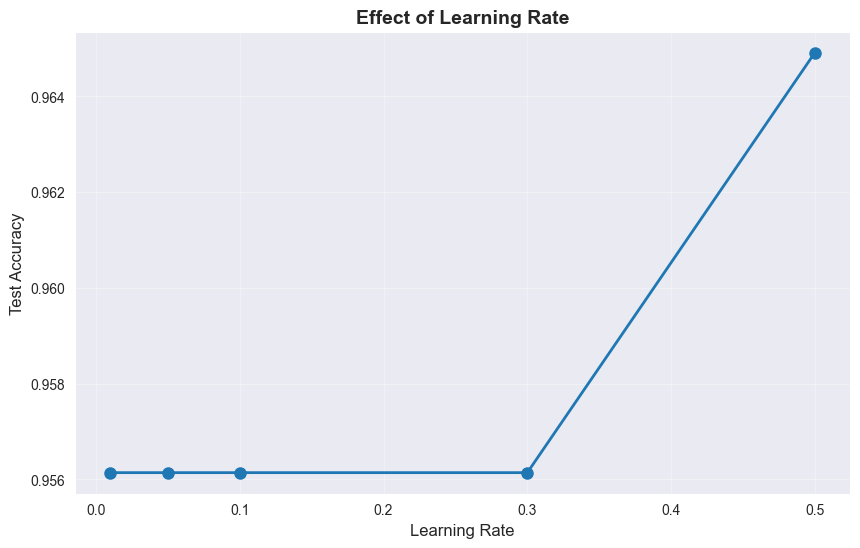

Best learning rate: 0.5
Best accuracy: 96.49%


In [6]:
learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5]
accuracies = []

for lr in learning_rates:
    gb_temp = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    gb_temp.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, gb_temp.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, 'o-', linewidth=2, markersize=8)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Effect of Learning Rate', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f'Best learning rate: {learning_rates[np.argmax(accuracies)]}')
print(f'Best accuracy: {max(accuracies)*100:.2f}%')

---
## Feature Importance

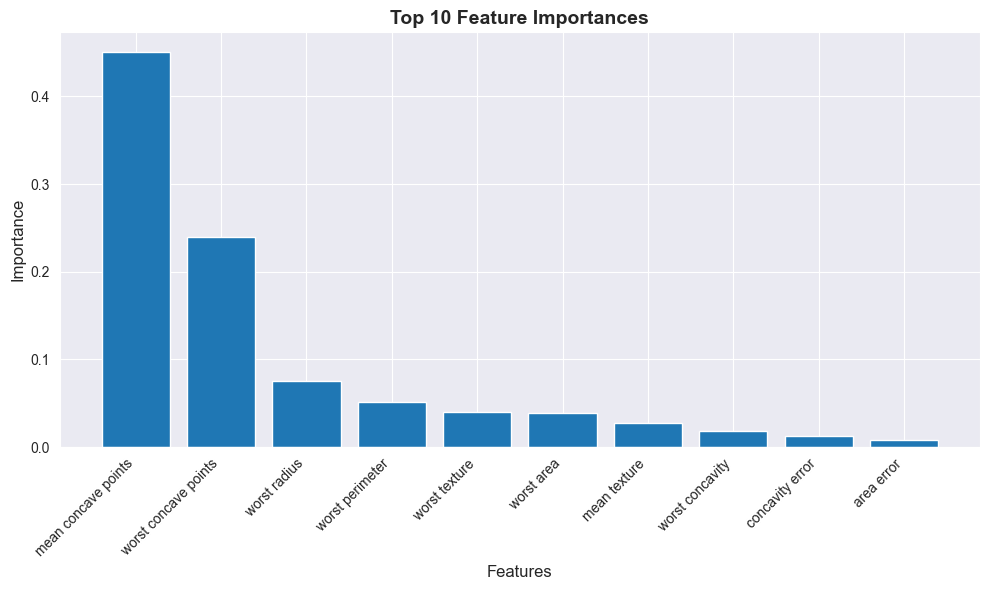

In [7]:
# Get feature importance
importance = gb.feature_importances_
indices = np.argsort(importance)[::-1][:10]  # Top 10

plt.figure(figsize=(10, 6))
plt.bar(range(10), importance[indices])
plt.xticks(range(10), [cancer.feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Summary

**Key Points:**
- Gradient Boosting fits trees to residuals sequentially
- Learning rate controls contribution of each tree
- Often achieves best performance on structured data
- Requires careful hyperparameter tuning
- Monitor validation curve to prevent overfitting

**Key Point:** "Gradient Boosting minimizes loss by fitting new trees to gradients (residuals). Small steps (low learning rate) with many trees generalizes best."